<a href="https://colab.research.google.com/github/hoangpanda/colab-algorithm-deploy/blob/main/keras_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [20]:
print('x_train shape:\t', x_train.shape)
print('y_train shape:\t', y_train.shape)
print('x_test shape:\t', x_test.shape)
print('y_test shape:\t', y_test.shape)

x_train shape:	 (60000, 28, 28)
y_train shape:	 (60000,)
x_test shape:	 (10000, 28, 28)
y_test shape:	 (10000,)


In [21]:
import keras
num_classes = 10
x_train = x_train/255
x_test = x_test/255
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras import optimizers


model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, input_shape=(28,28), activation='relu'))
model.add(Dense(256, input_shape=(28,28), activation='relu'))
model.add(Dense(512, input_shape=(28,28), activation='relu'))
model.add(Dense(1024, input_shape=(28,28), activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer=optimizers.Adam(), metrics='accuracy', loss=keras.losses.categorical_crossentropy)

model.fit(x_train, y_train, epochs=20, batch_size=128)

Epoch 1/20
469/469 [==============================] - 12s 24ms/step - loss: 0.2538 - accuracy: 0.9229
Epoch 2/20
469/469 [==============================] - 10s 22ms/step - loss: 0.1016 - accuracy: 0.9688
Epoch 3/20
469/469 [==============================] - 11s 23ms/step - loss: 0.0709 - accuracy: 0.9782
Epoch 4/20
469/469 [==============================] - 11s 24ms/step - loss: 0.0546 - accuracy: 0.9830
Epoch 5/20
469/469 [==============================] - 11s 24ms/step - loss: 0.0444 - accuracy: 0.9858
Epoch 6/20
469/469 [==============================] - 12s 25ms/step - loss: 0.0367 - accuracy: 0.9882
Epoch 7/20
469/469 [==============================] - 11s 24ms/step - loss: 0.0330 - accuracy: 0.9893
Epoch 8/20
469/469 [==============================] - 11s 23ms/step - loss: 0.0290 - accuracy: 0.9910
Epoch 9/20
469/469 [==============================] - 10s 22ms/step - loss: 0.0277 - accuracy: 0.9912
Epoch 10/20
469/469 [==============================] - 11s 24ms/step - loss: 0.023

In [23]:
model.evaluate(x_test, y_test, batch_size=128) # overfitting

79/79 [==============================] - 0s 4ms/step - loss: 0.1044 - accuracy: 0.9774


[0.1044439971446991, 0.977400004863739]

In [28]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [30]:
print('x_train shape:\t', x_train.shape)

x_train shape:	 (60000, 28, 28, 1)


In [39]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))  # Sửa activation thành 'relu'
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))  # Sửa activation thành 'relu'
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])  # Sửa metrics thành list

model.fit(x_train, y_train, epochs=20, batch_size=128)


Epoch 1/20
469/469 [==============================] - 32s 66ms/step - loss: 0.2305 - accuracy: 0.9338
Epoch 2/20
469/469 [==============================] - 30s 65ms/step - loss: 0.0716 - accuracy: 0.9797
Epoch 3/20
469/469 [==============================] - 30s 64ms/step - loss: 0.0473 - accuracy: 0.9858
Epoch 4/20
469/469 [==============================] - 31s 66ms/step - loss: 0.0346 - accuracy: 0.9897
Epoch 5/20
469/469 [==============================] - 30s 65ms/step - loss: 0.0265 - accuracy: 0.9920
Epoch 6/20
469/469 [==============================] - 31s 67ms/step - loss: 0.0203 - accuracy: 0.9938
Epoch 7/20
469/469 [==============================] - 31s 67ms/step - loss: 0.0142 - accuracy: 0.9958
Epoch 8/20
469/469 [==============================] - 30s 64ms/step - loss: 0.0110 - accuracy: 0.9968
Epoch 9/20
469/469 [==============================] - 30s 64ms/step - loss: 0.0086 - accuracy: 0.9976
Epoch 10/20
469/469 [==============================] - 32s 68ms/step - loss: 0.006

In [43]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.0480 - accuracy: 0.9895


[0.04798881337046623, 0.9894999861717224]

1/1 [==============================] - 0s 37ms/step
9


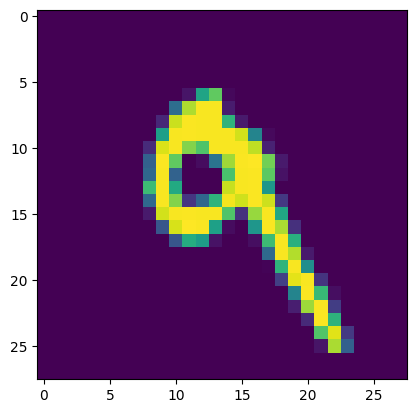

In [53]:
import numpy as np
img = x_test[7]
y = model.predict(img.reshape(1,28,28,1))
print(np.argmax(y))
import matplotlib.pyplot as plt
plt.imshow(img.reshape(28,28))